In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df = pd.read_csv('movies.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [153]:
# Dropping potential duplicates
df = df.drop_duplicates()

In [154]:
# Checking for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}: {np.round(pct_missing, 1)*100}%')

name: 0.0%
rating: 0.0%
genre: 0.0%
year: 0.0%
released: 0.0%
score: 0.0%
votes: 0.0%
director: 0.0%
writer: 0.0%
star: 0.0%
country: 0.0%
budget: 30.0%
gross: 0.0%
company: 0.0%
runtime: 0.0%


In [155]:
# Dropping rows with missing values
df = df.dropna()

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}: {np.round(pct_missing, 1)*100}%')

name: 0.0%
rating: 0.0%
genre: 0.0%
year: 0.0%
released: 0.0%
score: 0.0%
votes: 0.0%
director: 0.0%
writer: 0.0%
star: 0.0%
country: 0.0%
budget: 0.0%
gross: 0.0%
company: 0.0%
runtime: 0.0%


In [156]:
# Observing the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [157]:
# Changing unnecessary floats to integers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [158]:
# Utilizing regex to create a new column that contains the correct release year
df['year_released'] = df['released'].str.extract(r'(\d{4})')

# Dropping the old incorrect "year" column
df = df.drop(columns = 'year')

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [159]:
# Displaying max rows and sorting the dataframe by highest gross
pd.set_option('display.max_rows', None)
df = df.sort_values(by = ['gross'], ascending = False, inplace = False)

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [160]:
# Creating a correlation matrix of the numeric columns 
df_numeric = df.select_dtypes(include = ['float', 'int64'])
corr = df_numeric.corr()

corr

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [161]:
# Using cat.codes to create a new dataframe of fully numeric columns
df_numeric_full = df.copy()
for col in df_numeric_full:
    if df_numeric_full[col].dtype == 'object':
        df_numeric_full[col] = df_numeric_full[col].astype('category')
        df_numeric_full[col] = df_numeric_full[col].cat.codes

df_numeric_full.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
7445,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39
3045,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
6663,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35
7244,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38


In [162]:
# Creating a new correlation matrix using the new fully numeric dataframe
corr_full = df_numeric_full.corr()

corr_full

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


In [163]:
# Pairing and sorting the values for increased readability
corr_pairs = corr_full.unstack().sort_values(ascending = False)

corr_pairs.head(20)

year_released  year_released    1.000000
rating         rating           1.000000
runtime        runtime          1.000000
company        company          1.000000
country        country          1.000000
budget         budget           1.000000
name           name             1.000000
score          score            1.000000
votes          votes            1.000000
released       released         1.000000
director       director         1.000000
star           star             1.000000
gross          gross            1.000000
genre          genre            1.000000
writer         writer           1.000000
budget         gross            0.740247
gross          budget           0.740247
votes          gross            0.614751
gross          votes            0.614751
score          votes            0.474256
dtype: float64

In [164]:
# Filtering the values to only contain pairs with a correlation of higher than .5 and less than 1
high_corr = corr_pairs[(corr_pairs > .5) & (corr_pairs < 1)].sort_values(ascending = False)

high_corr

budget  gross     0.740247
gross   budget    0.740247
votes   gross     0.614751
gross   votes     0.614751
dtype: float64

In [165]:
# Budget and votes have the highest positive correlation with gross earnings

<Figure size 640x480 with 0 Axes>

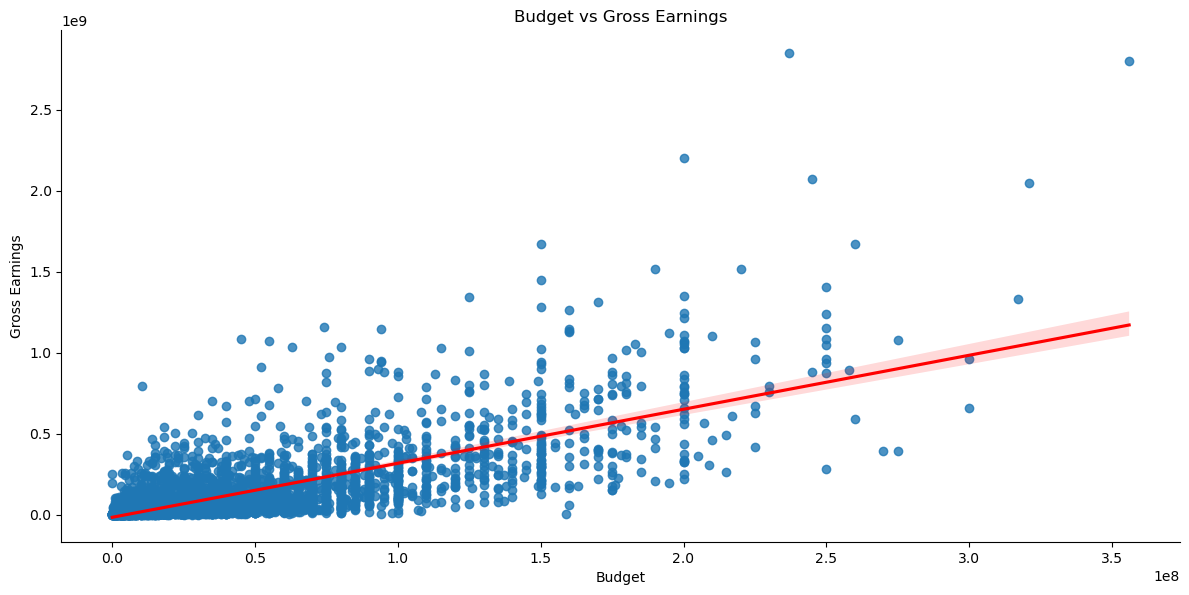

In [166]:
# Scatter plot + a fitted regression line to visualize the relationship between budget and gross earnings
plt.figure()
sns.lmplot(x = 'budget', y = 'gross', data = df, line_kws = {'color': 'red'}, height = 6, aspect = 2)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<Figure size 640x480 with 0 Axes>

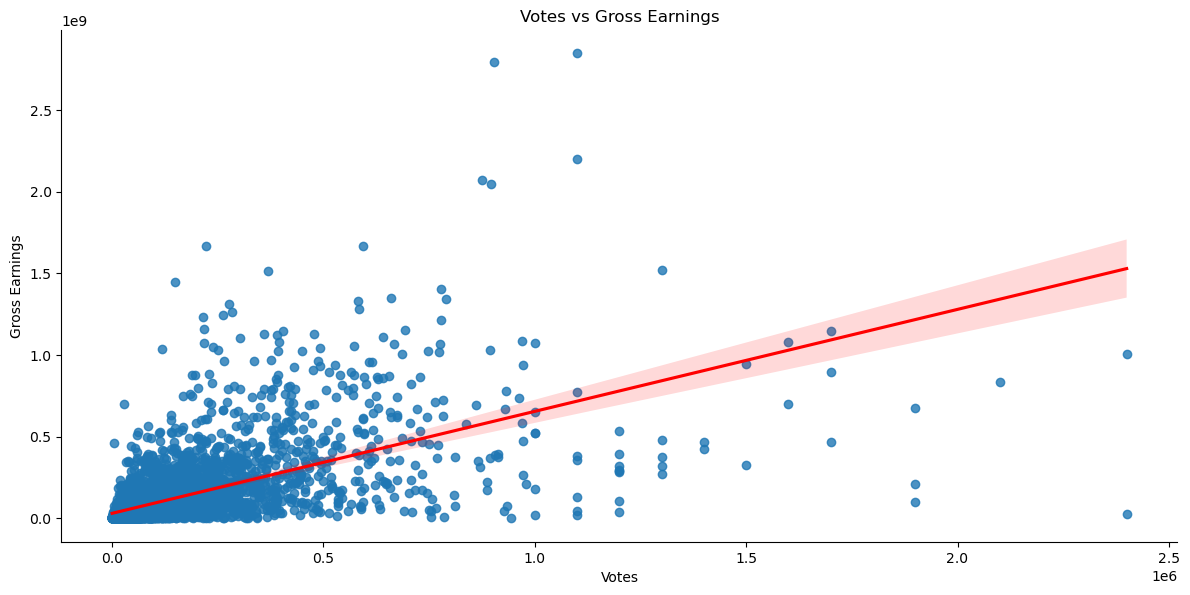

In [167]:
# Scatter plot + a fitted regression line to visualize the relationship between votes and gross earnings
plt.figure()
sns.lmplot(x = 'votes', y = 'gross', data = df, line_kws = {'color': 'red'}, height = 6, aspect = 2)
plt.title('Votes vs Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')
plt.show()